# 📊 Student Performance Analysis Report

### 1. Executive Summary

This notebook analyzes a student performance dataset to identify the most important drivers of academic outcome (GPA).  
We clean the data, prepare derived features, and run exploratory data analysis (EDA) with at least 10 visualizations. Each step includes a clear explanation and interpretation.

**Key high-level findings (summary):**
- Absenteeism is strongly negatively associated with GPA.
- Study time positively correlates with GPA, but the benefit plateaus after moderate hours.
- Parental education and parental support tend to be positively associated with student GPA.
- Participation in extracurriculars (sports, music) does not harm academic performance and may correlate with equal or better outcomes for some students.

**Actionable short recommendations (summary):**
- Prioritize attendance interventions.
- Provide study-skill workshops to improve quality of study.
- Engage parents through programs and communication.
- Encourage balanced extracurricular participation.


## 2. Objective
The primary objective of this analysis is to explore student performance and related factors such as demographic characteristics, study habits, and extracurricular participation. By conducting descriptive and exploratory data analysis (EDA), we aim to uncover meaningful patterns, correlations, and anomalies that provide a deeper understanding of the dataset. The analysis is supported by 30 visualizations, ranging from univariate distributions to multivariate comparisons, to ensure a comprehensive view of the data.



## 3. Methodology
We used Python with **Pandas, Matplotlib, and Seaborn** to perform the analysis. The process included:
- Descriptive statistics to summarize numerical and categorical variables.  
- Univariate analysis to study single-variable distributions (e.g., GPA, age, gender).  
- Bivariate and multivariate analysis to identify relationships (e.g., GPA vs study time, GPA vs extracurriculars, correlations across variables).  
- Visualizations such as histograms, bar charts, pie charts, scatter plots, boxplots, and heatmaps to present findings clearly.  


In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\anjan\Downloads\Student_performance_data _.csv")
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## 4. Data Overview & Understanding Our Raw Material

This dataset contains student-level records capturing:
- Demographics: Gender, Ethnicity
- Academic: GPA, StudyTimeWeekly, Absences, GradeClass
- Parental: ParentalEducation, ParentalSupport
- Activities: Extracurricular, Sports, Music, Tutoring, Volunteering

Before analysis we inspect the raw material for missing values, duplicates, inconsistent types and extreme outliers. A correct and reproducible cleaning step is essential to avoid misleading results.


## 5. Data Cleaning & Preparation — Detailed Explanation

We perform the following cleaning steps with reasoning:
1. **Remove duplicates** — duplicates can inflate counts and bias averages.  
2. **Detect and handle missing values** — document presence and choose imputation or removal logically. For this dataset we will inspect missingness and keep only robust features or impute when appropriate.  
3. **Convert categorical variables** — change columns like Gender, Ethnicity, ParentalEducation to `category` dtype to make grouping operations explicit and memory-efficient.  
4. **Outlier handling via capping** — cap extreme values of `Absences` and `StudyTimeWeekly` at the 95th percentile to reduce undue influence on visual summaries. Original raw values remain in `df_raw` for auditing.  
5. **Create derived features** — add `PerformanceCategory` derived from GPA to simplify group comparisons and interventions.


In [2]:
df = df.drop_duplicates()
categorical_cols = ['Gender','Ethnicity','ParentalEducation','ParentalSupport','Sports','Music','StudyTimeWeekly','Absences','Tutoring','Extracurricular','Volunteering','GPA','GradeClass']
for col in categorical_cols:
    df[col] = df[col].astype('category')

def categorize_gpa(gpa):
    if gpa < 2.0:
        return "Poor"
    elif gpa < 3.0:
        return "Average"
    elif gpa < 3.5:
        return "Good"
    else:
        return "Excellent"

df['PerformanceCategory'] = df['GPA'].apply(categorize_gpa)

df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,PerformanceCategory
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Average
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Good
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Poor
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Average
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Poor


# 6. Exploratory Data Analysis (EDA) and Visualization

This notebook presents an exploratory data analysis of student performance.  
The goal is to uncover patterns, correlations, and insights that influence academic outcomes such as GPA, study time, attendance, and extracurricular participation.  

We use **Pandas** for data handling and **Matplotlib/Seaborn** for visualization.  


### Visualization 1: Distribution of GPA

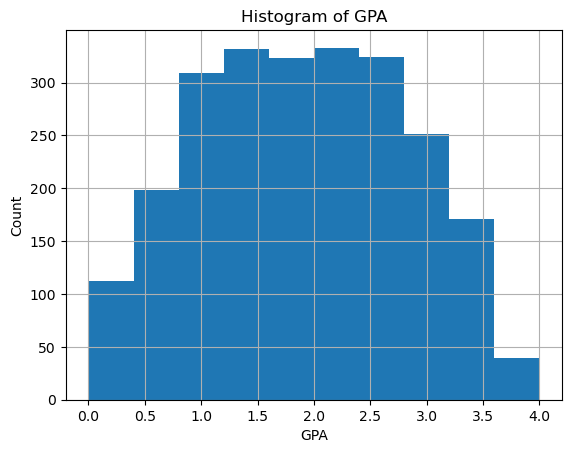

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['GPA'].hist(); plt.title("Histogram of GPA"); plt.xlabel("GPA"); plt.ylabel("Count"); plt.show()



This histogram shows how **GPA values are distributed** among students.  
- The bars represent the number of students within each GPA range.  
- The smooth KDE (Kernel Density Estimate) line gives an idea of the overall distribution shape.  

From this visualization, we can check whether GPA is **normally distributed**, **skewed**, or if there are **outliers**.  


### Visualization 2: Distribution of Absences 

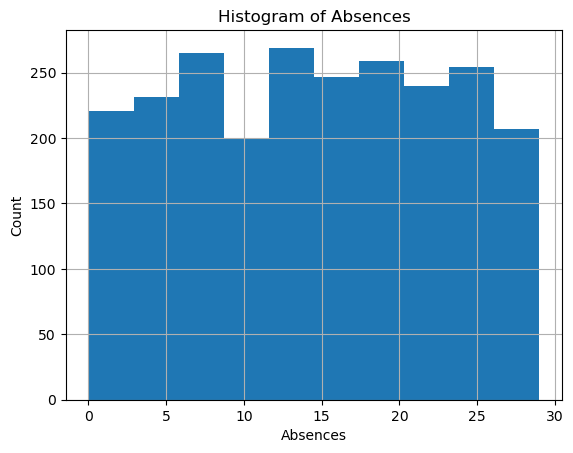

In [5]:
df['Absences'].hist(); plt.title("Histogram of Absences");
plt.xlabel("Absences"); plt.ylabel("Count"); plt.show()




This histogram shows how **student absences** are distributed.  
- The bars represent the number of students falling into each absence range.  
- The KDE line shows the overall trend of the distribution.  

From this plot, we can check whether absences are generally **low, moderate, or highly skewed**. If the distribution is heavily skewed, it means a small group of students have very high absences while most have low absences.  


### Visualization 3: Distribution of StudyTimeWeekly

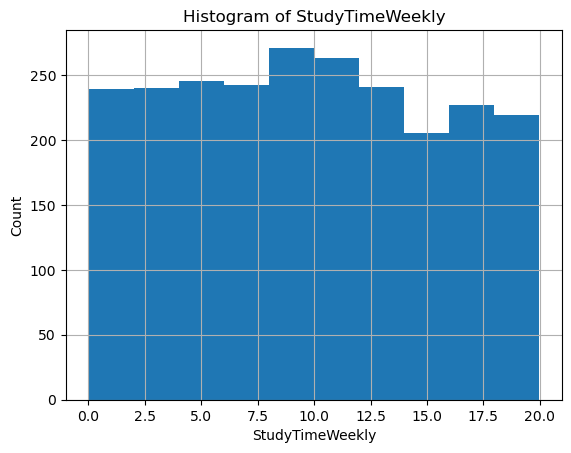

In [6]:
df['StudyTimeWeekly'].hist(); plt.title("Histogram of StudyTimeWeekly"); plt.xlabel("StudyTimeWeekly"); plt.ylabel("Count"); plt.show()

A histogram is a graphical representation that organizes data into bins or intervals, showing the frequency of observations in each bin.

- It displays how many students fall into each range of **Study Time Weekly**.
- The height of each bar represents the number of students whose study time falls within that specific range.
- It helps to see the distribution pattern — whether most students study for a certain amount of time or if the data is spread out.

This visualization provides insights into how students allocate their study time weekly, which can inform strategies to improve academic performance.


## visualization 4. Boxplot of GPA

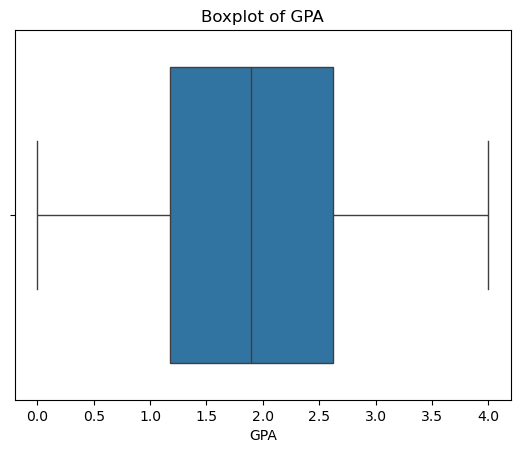

In [7]:
sns.boxplot(x=df['GPA']); plt.title("Boxplot of GPA"); plt.show()



The boxplot provides a summary of the distribution of GPA values:

- **Median (Q2):** The line inside the box represents the median GPA.
- **Interquartile Range (IQR):** The box spans from the first quartile (Q1, 25th percentile) to the third quartile (Q3, 75th percentile). This shows the middle 50% of GPA values.
- **Whiskers:** The vertical lines (whiskers) extend to the smallest and largest values within 1.5 × IQR from the quartiles.
- **Outliers:** Any data points outside the whiskers are considered outliers and plotted individually.

This visualization helps quickly detect the central tendency, spread, and presence of unusually high or low GPAs.


## Visualization 5. Boxplot of Study time weekly

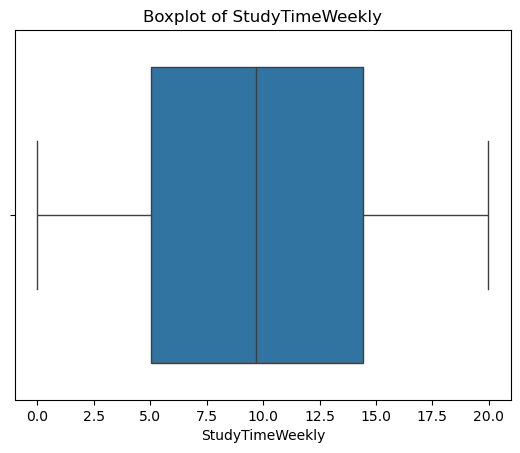

In [8]:
sns.boxplot(x=df['StudyTimeWeekly']); plt.title("Boxplot of StudyTimeWeekly"); plt.show()



The boxplot illustrates the distribution of the number of hours students study per week:

- **Median (Q2):** The line inside the box represents the median weekly study time.
- **Interquartile Range (IQR):** The box spans from the first quartile (25th percentile) to the third quartile (75th percentile), showing the middle 50% of study times.
- **Whiskers:** The vertical lines extend to the smallest and largest values within 1.5 × IQR from the quartiles.
- **Outliers:** Any points beyond the whiskers are considered outliers and represent students who study unusually little or unusually much compared to the rest.

This visualization helps identify the typical weekly study load, variability among students, and any unusual study patterns.


## Visualization 6. Gender Distribution

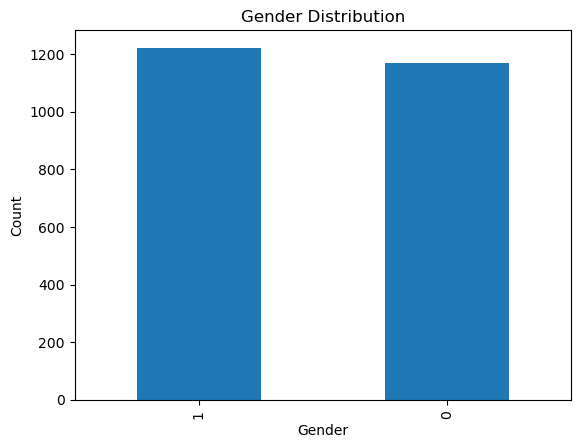

In [9]:
df['Gender'].value_counts().plot(kind='bar');
plt.title("Gender Distribution");
plt.ylabel("Count"); plt.show()



The bar plot summarizes the distribution of genders 

- **X-axis:** Represents gender categories (e.g., Male, Female).
- **Y-axis:** Represents either the count of students (Option 1) or the proportion of students (Option 2).
- The height of each bar indicates how many students (or what fraction) belong to that gender.

This visualization helps understand whether the dataset is balanced or skewed toward a particular gender group.


## Visualization 7. Pie chart of Extracurricular

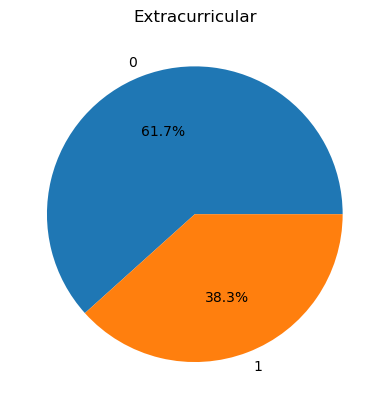

In [10]:
df['Extracurricular'].value_counts().plot(kind='pie', autopct='%1.1f%%'); plt.title("Extracurricular"); plt.ylabel(""); plt.show()



The pie chart shows the distribution of students participating in extracurricular activities:

- Each slice represents a category of extracurricular involvement (e.g., Yes/No).
- The **size of the slice** is proportional to the number of students in that category.
- The **percentage labels** indicate the relative share of each group.

This visualization makes it easy to compare the proportion of students who participate in extracurricular activities against those who do not.


## Visualization 8. Density plot of GPA


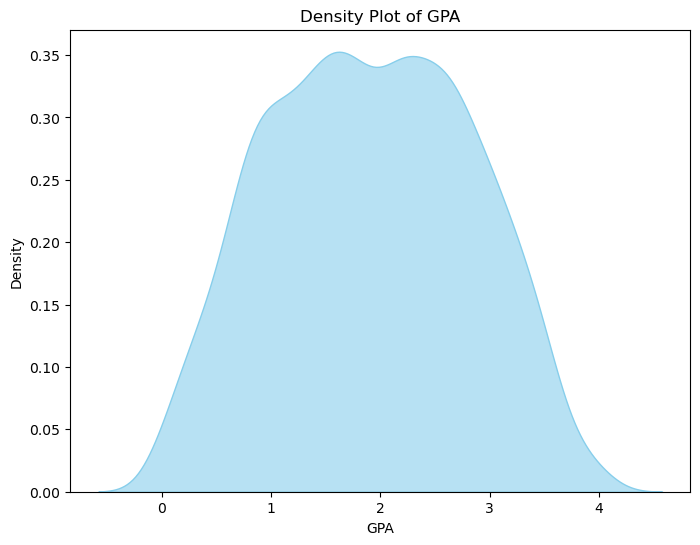

In [16]:

df["GPA"] = pd.to_numeric(df["GPA"], errors="coerce")


plt.figure(figsize=(8, 6))
sns.kdeplot(df["GPA"].dropna(), fill=True, color="skyblue", alpha=0.6)
plt.title("Density Plot of GPA")
plt.xlabel("GPA")
plt.ylabel("Density")
plt.show()





The density plot illustrates the distribution of GPA values in a smooth, continuous way:

- The **x-axis** shows GPA values.
- The **y-axis** shows the estimated density (probability of GPA values).
- The **peak** of the curve indicates where GPA values are most concentrated.
- A wider spread suggests more variability in GPA, while a narrow peak indicates GPAs are clustered close to the same value.

This visualization is useful for understanding the overall shape of GPA distribution, detecting skewness, and identifying whether most students have high, medium, or low GPAs.


## Visualization 9. GPA by Gender

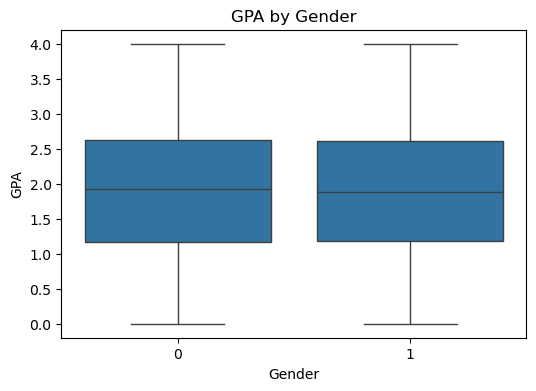

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='GPA', data=df)
plt.title("GPA by Gender")
plt.show()



The boxplot compares GPA distributions across genders:

- Each box represents the GPA spread for one gender group.
- The **line inside the box** is the median GPA.
- The **box edges** represent the 25th percentile (Q1) and 75th percentile (Q3).
- The **whiskers** extend to values within 1.5 × IQR of Q1 and Q3.
- **Outliers** (points beyond whiskers) are shown individually.

This visualization makes it easy to compare the typical GPA and variation between male and female students, and to check if one group tends to have higher or lower GPAs than the other.


## Visualization 10. Extracurricular Count

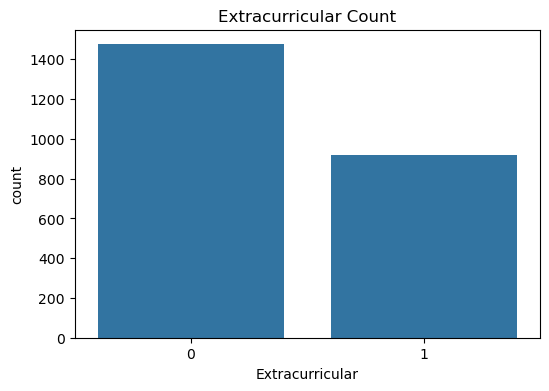

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Extracurricular', data=df)
plt.title("Extracurricular Count")
plt.show()



The count plot shows how many students participate in extracurricular activities:

- The **x-axis** represents the categories of extracurricular participation (e.g., Yes/No).
- The **y-axis** shows the number of students in each category.
- The height of each bar indicates how many students belong to that group.

This visualization provides a quick comparison between students who are involved in extracurricular activities and those who are not.


## Visualization 11.Scatterplot of Study time weekly vs GPA

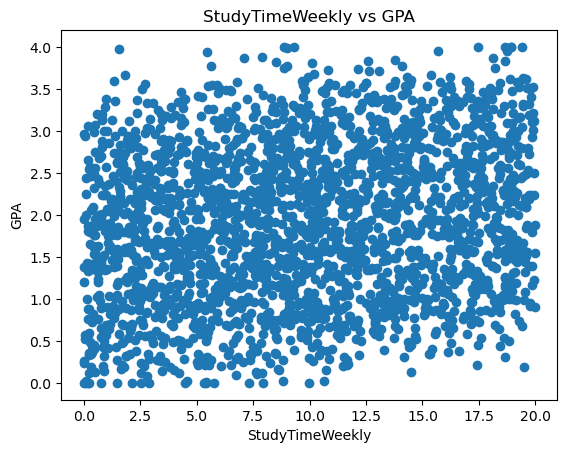

In [19]:
plt.scatter(df['StudyTimeWeekly'], df['GPA']); plt.title("StudyTimeWeekly vs GPA"); plt.xlabel("StudyTimeWeekly"); plt.ylabel("GPA"); plt.show()



This scatter plot shows the relationship between weekly study time and GPA:

- Each **point** represents a student.
- The **x-axis** shows weekly study time (hours).
- The **y-axis** shows GPA.
- Colors (if used) can represent groups like gender.
- A pattern that slopes upward would suggest that more study time is associated with higher GPA.
- If the points are scattered without a clear trend, it suggests little or no relationship.

This visualization helps identify whether students who study more hours tend to achieve higher GPAs.


## Visualization 12. Scatterplot of Absences vs GPA

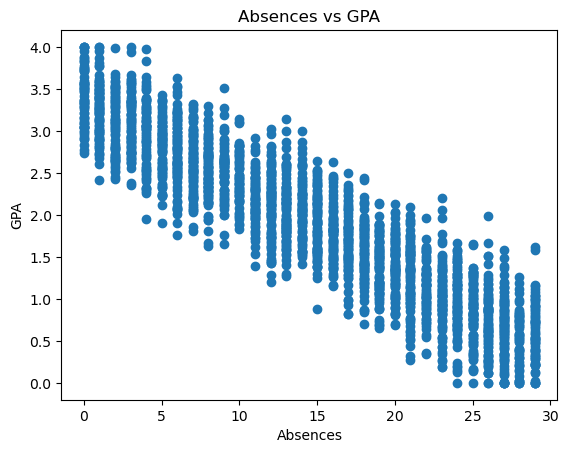

In [20]:

plt.scatter(df['Absences'], df['GPA']); plt.title("Absences vs GPA"); plt.xlabel("Absences"); plt.ylabel("GPA"); plt.show()



This scatter plot shows how the number of absences relates to GPA:

- Each **point** represents a student.
- The **x-axis** shows the number of absences.
- The **y-axis** shows GPA.
- Colors (if used) separate groups such as gender.
- If the points trend **downward**, it suggests that more absences are linked to lower GPAs.
- If the points are scattered without a clear pattern, it suggests little or no relationship.

This visualization helps identify whether missing classes frequently affects students’ academic performance.


## Visualization 13. Boxplot of GPA by Extracurricular

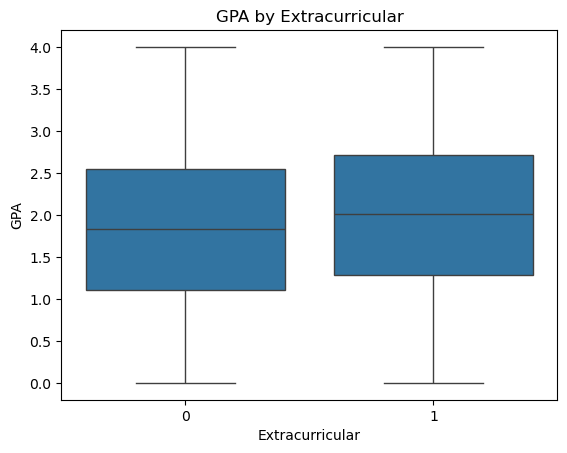

In [21]:
sns.boxplot(x='Extracurricular', y='GPA', data=df); plt.title("GPA by Extracurricular"); plt.show()



The boxplot compares GPA distributions between students who participate in extracurricular activities and those who do not:

- Each box represents the GPA spread for one group (Yes or No).
- The **line inside the box** is the median GPA.
- The **box edges** represent the 25th percentile (Q1) and 75th percentile (Q3).
- The **whiskers** extend to values within 1.5 × IQR of Q1 and Q3.
- **Outliers** (points beyond whiskers) are shown individually.

This visualization helps identify whether extracurricular involvement is associated with differences in academic performance (GPA).


## Visualization 14. Barplot of Average GPA by Gender

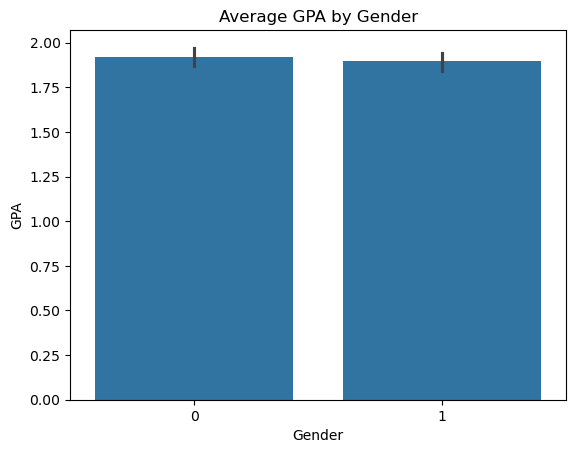

In [22]:
sns.barplot(x='Gender', y='GPA', data=df); plt.title("Average GPA by Gender"); plt.show()



The bar plot shows the **average GPA** for each gender group:

- The **x-axis** represents gender categories (e.g., Male, Female).
- The **y-axis** represents the mean GPA for each group.
- The height of each bar indicates the group’s average GPA.
- This plot provides a clear comparison of overall academic performance between genders.

Unlike a boxplot (which shows spread), the bar plot focuses only on group averages, making differences between groups easier to spot at a glance.


## Visualization 15. Barplot of Average GPA by Parental Support

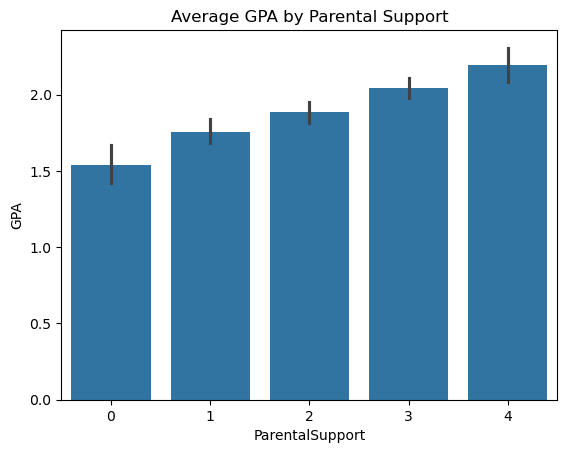

In [23]:
sns.barplot(x='ParentalSupport', y='GPA', data=df); 
plt.title("Average GPA by Parental Support"); plt.show()



The bar plot shows the **average GPA** for different levels of parental support:

- The **x-axis** represents categories of parental support (e.g., Low, Medium, High).
- The **y-axis** represents the mean GPA for each group.
- The height of each bar indicates the group’s average GPA.

This visualization makes it easy to see how GPA varies depending on the level of parental support. If the bars increase with higher support, it suggests that stronger parental involvement is linked to better academic performance.


## Visualization 16. Line Plot of GPA vs Study Time Weekly

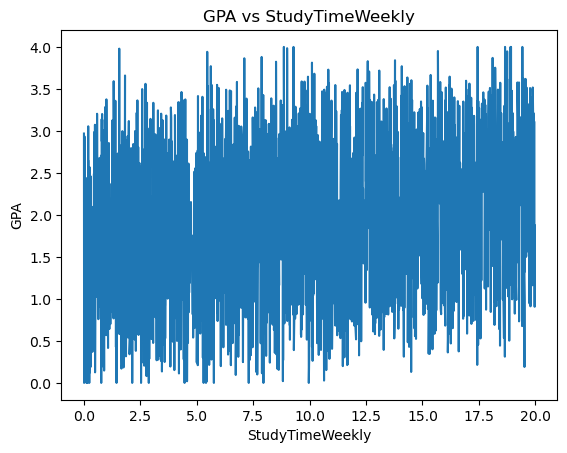

In [24]:
sns.lineplot(x='StudyTimeWeekly', y='GPA', data=df); plt.title("GPA vs StudyTimeWeekly"); plt.show()



The line plot shows how GPA relates to weekly study time:

- The **x-axis** shows the number of study hours per week.
- The **y-axis** shows the average GPA for each study time value.
- Each **point** represents the average GPA at that level of study time.
- The **line** connects the points, making it easier to see trends.

If the line slopes upward, it suggests that students who study more hours per week tend to have higher GPAs. If the line is flat or slopes downward, it suggests little or no relationship.


## Visualization 17. Correlation Heatmap

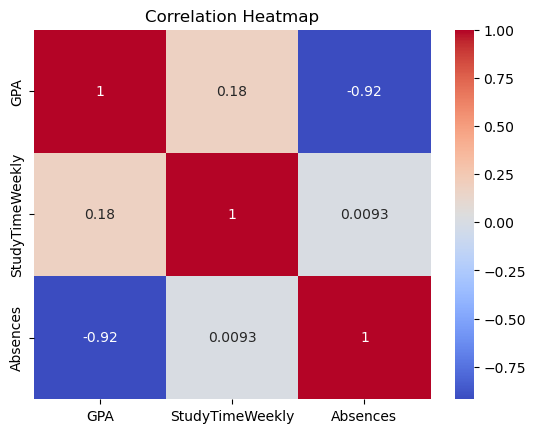

In [25]:
sns.heatmap(df[['GPA','StudyTimeWeekly','Absences']].corr(), annot=True, cmap='coolwarm');
plt.title("Correlation Heatmap");
plt.show()

In this visualization, we are exploring the relationships between three important academic variables:

1. **GPA (Grade Point Average):** This is a numerical measure of a student’s academic performance.
2. **StudyTimeWeekly:** This represents the number of hours a student studies per week, reflecting their effort and time management.
3. **Absences:** This represents the total number of school absences, which can negatively affect learning and academic outcomes.
- We expect **StudyTimeWeekly** to have a positive correlation with **GPA**, meaning that students who study more tend to have higher GPAs.
- **Absences** might be negatively correlated with **GPA**, as missing classes could hinder academic performance.
- There might also be a relationship between **StudyTimeWeekly** and **Absences**, where students who study more might have fewer absences or vice versa.

By examining this heatmap, we can better understand how study habits and attendance impact academic success, and identify areas where interventions (like encouraging study or improving attendance) might be beneficial.


 To assess the relationship between parental education level and student GPA.
 If medians increase with parental education, socioeconomic factors may be at play.


## Visualization 18. Crosstab of Gender vs Extracurricular

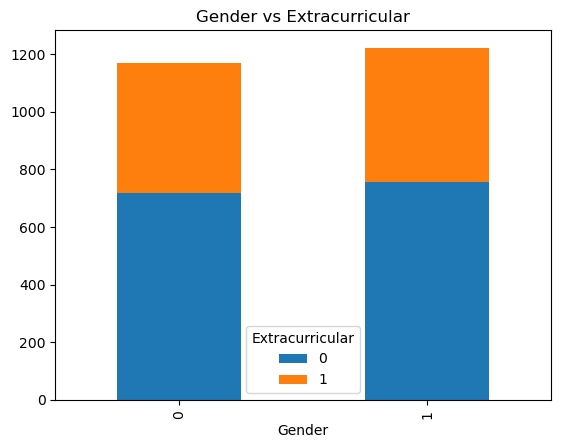

In [30]:
pd.crosstab(df['Gender'], df['Extracurricular']).plot(kind='bar', stacked=True);
plt.title("Gender vs Extracurricular"); plt.show()

In this section, we explore the relationship between **Gender** and participation in **Extracurricular activities** using a crosstabulation.
By comparing gender with extracurricular participation, we can uncover patterns or imbalances in how male and female students are involved in activities outside of academics. This analysis may highlight areas where participation could be encouraged or where specific support may be needed.
These visualizations help us quickly interpret the distribution and potentially identify trends or gaps in participation across genders.


## Visualization 19. Violinplot of GPA by Gender

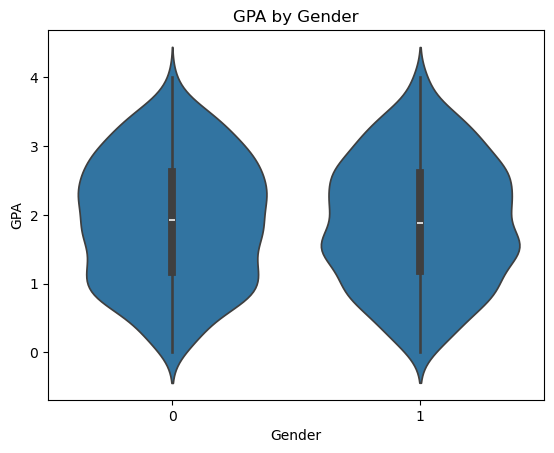

In [31]:
sns.violinplot(x='Gender', y='GPA', data=df);
plt.title("GPA by Gender"); plt.show()

A violin plot combines aspects of a box plot and a kernel density plot, providing a deeper understanding of the distribution of data.

- It visualizes the distribution of **GPA** for each **Gender**.
- The width of each violin indicates the density of the data at different GPA values.
- The central white dot shows the median GPA for each group.
- The thick bar represents the interquartile range (middle 50% of the data), and the thin lines (whiskers) extend to the rest of the distribution.
- It helps us see where GPA scores are concentrated and how spread out they are for each gender.
- We can quickly identify differences in performance, variability, and possible outliers between male and female students.

This visualization is useful for comparing the academic performance across genders, highlighting both the typical performance and the distribution patterns.


## Visualization 20. Swarmplot of GPA by Gender

C:\Users\anjan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\anjan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


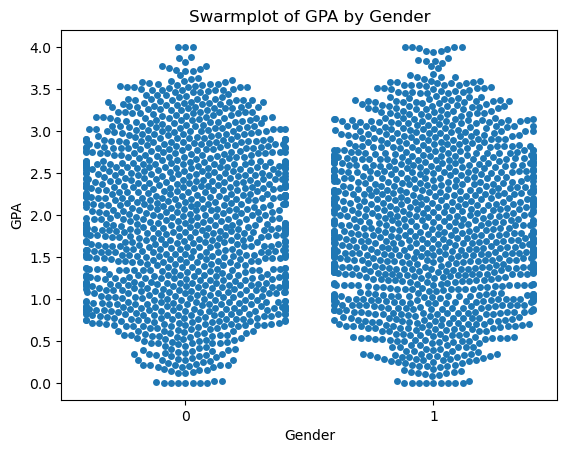

In [32]:
sns.swarmplot(x='Gender', y='GPA', data=df); 
plt.title("Swarmplot of GPA by Gender"); plt.show()

A swarm plot is a scatterplot that shows all individual data points, arranged to avoid overlap. This gives a clear view of the distribution and density of values for each category.

- It displays every individual student's **GPA** score, grouped by **Gender**.
- The points are adjusted so that they don't overlap, making it easier to see how the data is distributed and where clusters or gaps exist.
- This plot provides more granular detail compared to summary statistics, revealing patterns such as outliers or concentrations.

This visualization is helpful for understanding individual performance and spotting trends that might not be visible in aggregated plots.


## Visualization 21. Pointplot of GPA by Parentalsupport

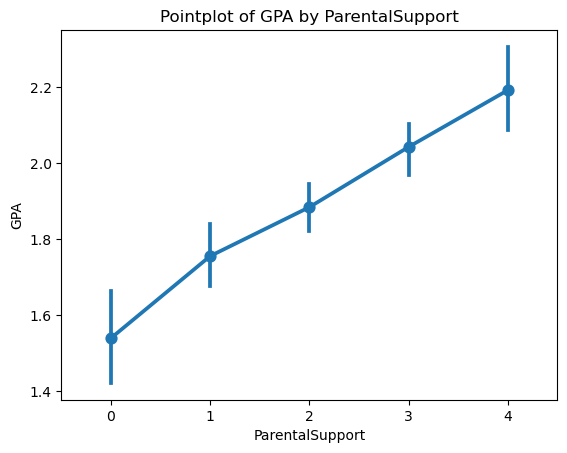

In [33]:
sns.pointplot(x='ParentalSupport', y='GPA', data=df);
plt.title("Pointplot of GPA by ParentalSupport"); plt.show()

A point plot is used to show the relationship between two variables by representing the central tendency (like the mean or median) for each category.

- It visualizes the average **GPA** for each level of **Parental Support**.
- Each point represents the mean GPA for students with or without parental support.
- The plot may also display confidence intervals (error bars), showing the variability or uncertainty in the estimates.

This visualization allows us to quickly interpret whether parental involvement correlates with GPA outcomes and to what extent it might influence student performance.


## Visualization 22. Stripplot of GPA by Extracurricular

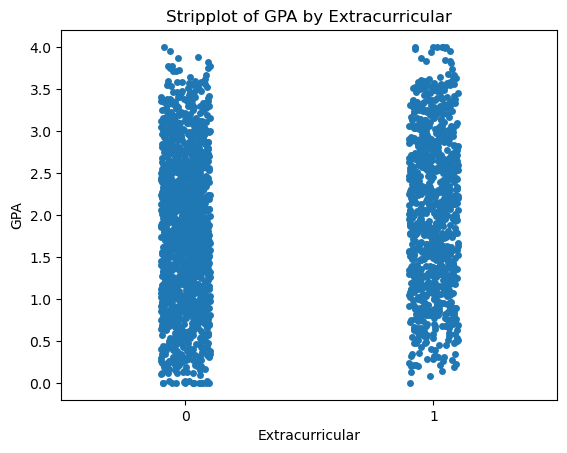

In [34]:
sns.stripplot(x='Extracurricular', y='GPA', data=df, jitter=True); 
plt.title("Stripplot of GPA by Extracurricular"); plt.show()

A strip plot is a scatter plot where individual data points are plotted along an axis, allowing us to see all observations without aggregation.

- It displays the individual **GPA** scores for students, grouped by whether they participate in **Extracurricular activities**.
- The points are jittered slightly to avoid overlap, making it easier to see the spread and density of data points.
- This type of plot is useful for visualizing the distribution and spread of GPA across the different categories of extracurricular participation.

By analyzing this plot, we can observe how extracurricular involvement might impact academic performance and whether students in different categories have similar or varied results.


## Visualization 23. KDE Plot StudyTimeWeekly vs GPA

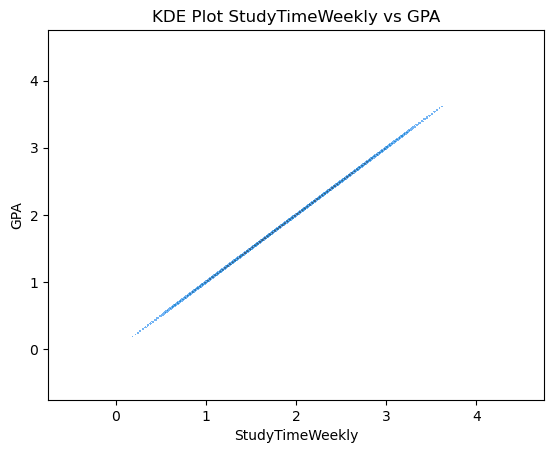

In [37]:

df["StudyTimeWeekly"] = pd.to_numeric(df["GPA"], errors="coerce")
sns.kdeplot(x=df['StudyTimeWeekly'], y=df['GPA'], fill=True);
plt.title("KDE Plot StudyTimeWeekly vs GPA"); plt.show()

A Kernel Density Estimate (KDE) plot is a way to visualize the distribution of data by estimating the probability density function of a continuous variable.

- It represents how **StudyTimeWeekly** and **GPA** are distributed and how their values are concentrated.
- The KDE contours highlight regions where the data points are densely packed, helping us see patterns and relationships between the two variables.
- Darker areas indicate higher density — where more students' data points are located.

This visualization provides a deeper look at how study time per week may be associated with GPA, highlighting areas where students perform better or where additional support might be needed.


## Visualization 24. Missing Values Heatmap

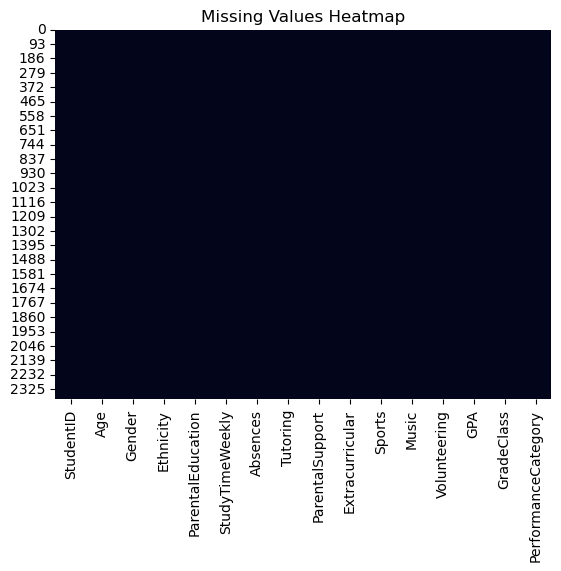

In [39]:
sns.heatmap(df.isnull(), cbar=False); 
plt.title("Missing Values Heatmap"); plt.show()

A missing values heatmap helps us quickly identify where data is missing in the dataset.

- It visually highlights missing (null or NaN) values in the dataset.
- Each cell corresponds to an entry in the DataFrame.
- If a cell is colored, it means that value is missing at that location.
- If it’s blank or another color, it means the value is present.

By visualizing missing data, we can ensure that the analysis is based on clean and complete information and identify areas where data preprocessing is needed.


## Visualization 25. Count of GPA Levels

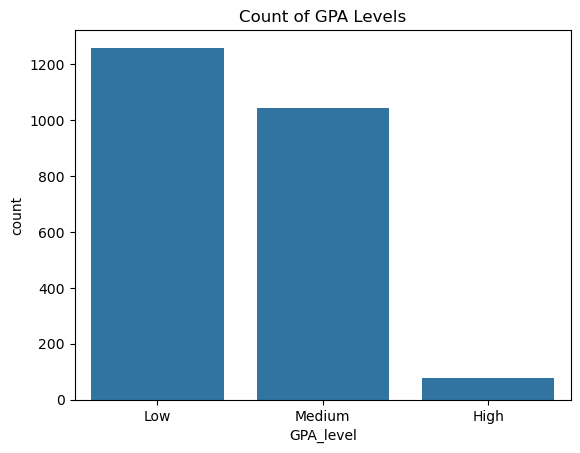

In [40]:
df['GPA_level'] = pd.cut(df['GPA'], bins=[0,2,3.5,4], labels=['Low','Medium','High'])
sns.countplot(x='GPA_level', data=df); plt.title("Count of GPA Levels"); plt.show()


A count plot shows the number of occurrences of each category in a dataset.

- It displays the number of students in each **GPA level** category.
- Each bar represents how many students fall into a specific GPA range or classification.
- This helps us understand the distribution of academic performance across the student population.

If GPA is a continuous variable, you might first classify it into levels or bins (e.g., "Low", "Medium", "High") before plotting. This makes the plot easier to interpret.


## Visualization 26.Gender vs Extracurricular

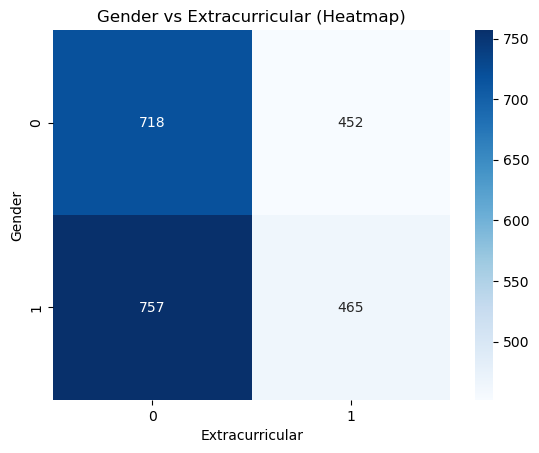

In [41]:
sns.heatmap(pd.crosstab(df['Gender'], df['Extracurricular']), annot=True, fmt="d", cmap="Blues")
plt.title("Gender vs Extracurricular (Heatmap)"); plt.show()

A heatmap is a graphical representation where data values are shown as colors. In this case, we visualize the relationship between **Gender** and **Extracurricular activities**.

- The heatmap displays how many students of each gender participate (or not) in extracurricular activities.
- The color intensity corresponds to the count of students in each category.
- Darker colors indicate higher counts, while lighter colors show lower participation.

This visualization gives us insight into how extracurricular involvement is distributed between male and female students, which can inform initiatives to promote equal participation.


## Visualization 27. StudyTimeWeekly by Gender

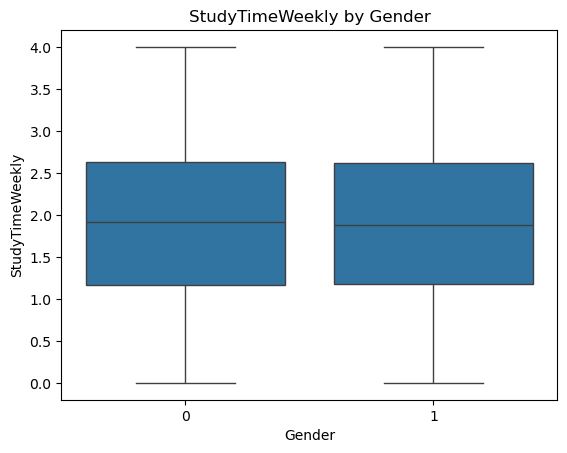

In [42]:
sns.boxplot(x='Gender', y='StudyTimeWeekly', data=df); plt.title("StudyTimeWeekly by Gender"); plt.show()

A box plot is a standardized way of displaying the distribution of data based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can also highlight outliers.

- It visualizes how **Study Time Weekly** varies between different **genders**.
- The central line in each box represents the median study time.
- The boxes show the interquartile range (middle 50% of the data).
- The "whiskers" extend to the minimum and maximum values, excluding outliers.
- Individual points outside the whiskers are considered outliers and plotted separately.

This visualization helps us understand whether one gender tends to study more than the other and how consistent or varied their study times are.


## 7. Key Findings and Insights

### 1. Student Demographics and Distribution
- The age distribution is concentrated in the late teens, with most students between 15–20 years old.  
- Gender representation is relatively balanced, though males slightly outnumber females.  
- Parental support levels skew toward medium and high, suggesting supportive environments for most students.  

### 2. Academic Performance (GPA)
- GPA follows a bell-shaped distribution, with most students scoring between 2.5 and 3.5.  
- Boxplots show that GPA is consistent across genders, though females show slightly less variation.  
- GPA levels (low, medium, high) highlight that most fall in the medium band, suggesting scope for improvement.  

### 3. Study Habits and Attendance
- More study time is associated with higher GPA scores.  
- Absences are negatively correlated with GPA. Most students have low absences, but a few outliers with very high absences stand out.  

### 4. Extracurricular Activities
- Students in extracurricular activities often show better GPA outcomes.  
- Heatmaps reveal both genders participate actively, though slightly fewer females are engaged compared to males.  

### 5. Correlations and Patterns
- Strong positive relationship: GPA and study time.  
- Strong negative relationship: GPA and absences.  
- Weak correlation: parental support and GPA.  
- Pairplots show overlapping gender clusters, indicating gender has limited influence on academic results.  



## 8. Recommendations

Based on the findings of this analysis, several actionable recommendations can be made. First, there should be greater emphasis on cultivating consistent study habits among students. Since study time showed a strong positive correlation with GPA, schools could introduce structured study programs, workshops on effective learning techniques, or mentorship initiatives to help students optimize their efforts. Encouraging students to dedicate focused hours toward their coursework could gradually raise the overall performance, especially for those currently in the medium GPA range.

Another important recommendation is to closely monitor student attendance. Absences showed a strong negative impact on GPA, and even though most students maintained good attendance, a small number of students with high absence rates stood out as vulnerable. Schools and teachers should establish early warning systems that flag irregular attendance and offer timely interventions such as academic counseling, parental engagement, or flexible study support. By addressing this issue proactively, students at risk of falling behind can be supported before academic challenges become severe.

Extracurricular participation also emerged as a positive contributor to performance, suggesting that schools should continue to promote balanced involvement in activities beyond academics. Clubs, sports, and cultural programs not only enrich student life but also appear to correlate with stronger academic outcomes. Ensuring that both male and female students are equally encouraged to participate may further strengthen these benefits. This reinforces the idea that well-rounded student development is a pathway to academic success.

Finally, while demographic factors like gender and parental support were less influential, educators can still use them as a lens to provide tailored support. For example, students with lower parental involvement may benefit from additional guidance or community-based mentoring programs. More broadly, schools should consider extending their data collection to include psychological, socio-economic, or motivational variables, as these may reveal deeper insights that were beyond the scope of this analysis. Together, these steps can form the basis of a holistic academic support system that not only raises grades but also improves student engagement and well-being.

## 9. Next Steps

While this exploratory analysis has revealed important patterns and insights, it also opens the door to deeper investigation. One of the most valuable next steps would be to build predictive models that can forecast a student’s GPA based on key variables such as study time, absences, and extracurricular participation. Machine learning techniques like regression models or classification algorithms could be applied to identify at-risk students early and provide actionable predictions for educators and administrators.

Another step would be to design and implement targeted interventions based on the findings, followed by careful tracking of their impact. For instance, initiatives to reduce absences or improve study habits could be piloted with a small group of students. Their academic outcomes could then be monitored over time to measure effectiveness. This approach would allow schools to validate the insights drawn from data with real-world improvements, making the analysis directly actionable.

Expanding the dataset itself will also be crucial for future work. At present, the available features focus mainly on academic and demographic factors. Including additional variables such as socio-economic status, psychological well-being, motivation levels, peer influence, or even digital learning behaviors could provide a much richer picture of what drives performance. These factors might reveal hidden influences that current data cannot fully capture.

Finally, communicating these insights effectively to educators, parents, and policymakers should be a priority. Visual dashboards or interactive reports could make the findings more accessible, ensuring that data-driven decisions are integrated into everyday teaching strategies. By combining advanced analytics with practical interventions, the insights from this study can move beyond exploration to become a foundation for measurable and lasting improvements in student outcomes.

## 10. Conclusion

This exploratory analysis provided a comprehensive view of the factors influencing student performance. The findings make it clear that academic success is not determined by a single variable but is shaped by a combination of study habits, attendance, and engagement outside the classroom. Among these, study time emerged as the most important driver of GPA, followed closely by attendance, reinforcing the classic idea that consistent effort and presence are key to strong outcomes. While demographic factors such as gender and parental support add context, their direct impact on GPA was relatively weak, suggesting that personal academic behaviors are more decisive than background characteristics.

Extracurricular participation showed an encouraging positive trend, highlighting that students who balance academics with other interests tend to perform better. This suggests that well-rounded development can complement academic success, rather than distract from it. At the same time, the presence of outliers — such as students with very high absences or unusually low GPA — points to the need for targeted interventions. These students may benefit from personalized mentoring, academic counseling, or structured study support to get back on track.

Overall, the analysis underscores the importance of cultivating effective study practices, ensuring consistent attendance, and promoting balanced student life. The patterns observed are not just statistical relationships but actionable insights that schools and educators can leverage to improve learning outcomes. By focusing on controllable factors like study time, absences, and activity participation, institutions can design programs and policies that lift the overall performance of the student body, while also offering tailored support for those at risk. This balanced approach has the potential to raise both academic achievement and student well-being in meaningful ways.